# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
#ваш код 

import numpy as np
import pandas as pd

# загрузим данные
df = pd.read_csv('Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
#ваш код 

# проверим  пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
#ваш код 

# df.info() показывает что пропусков нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
#ваш код 

X = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
#y = y.reshape(-1, 1)      для  координатного спуска у нужен как вектор
print(X.shape, y.shape)


(200, 4) (200,)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
# ваш код 

num_iters = 1000 #количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros(X.shape[1]) #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = np.sum(((X @ w) - y)**2)/(len(y))
        
print(w)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression


model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_) # результаты совпали

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
#ваш код

X = df[['TV', 'radio', 'newspaper']]
X_cent = X - X.mean()         # центрируем столбцы, вычисляя среднее по столбцам
X_st = X_cent/X_cent.std()    # делим на стандартное отклонение
X = X_st
# X_st.describe()
X.head()

,TV,radio,newspaper
1,0.967425,0.979066,1.774493
2,-1.194379,1.080097,0.667903
3,-1.512360,1.524637,1.779084
4,0.051919,1.214806,1.283185
5,0.393196,-0.839507,1.278593


**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
#ваш код

# вычисление среднеквадратичной ошибки
def mse_error(y_real, y_pred):
    diff = y_real - y_pred
    return np.sum(diff*diff)/len(diff)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
#ваш код

y_pred0 = np.ones(X.shape[0]) * y.mean()
print(mse_error(y_pred0, y))

27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
#ваш код

def lin_pred(X, w):    
    return X @ w


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
#ваш код

def stoch_grad_step(X, y, w, train_ind, eta):    
    x_train = X[train_ind]
    dir = x_train * ((x_train @ w) - y[train_ind]) # посчитаем направление изменения
    dw = 2 * eta * dir   # посчитаем delta параметров как направление изменения, умноженное на шаг градиентного спуска
    return w - dw
 

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
# ваш код
from numpy import random

def stochastic_gradient_descent(X, y, w0, eta, max_iter, tol):   
    distance = 100000.0
    err = []    
    for i in range(max_iter):
        index = random.randint(len(y) - 1)    # выбираем случайный индекс   
        w = stoch_grad_step(X, y, w0, index, eta) # вычисляем новый вектор параметров
        diff = w - w0
        distance = np.sqrt(np.sum(diff*diff))
        err.append(mse_error(y, lin_pred(X, w))) # вычисляем  среднеквадратичную ошибку
        if (distance <= tol): #  прекращаем работу при достижении заданного расстояние между соседними векторами весов
            return (w, err)        
        w0 = w   
    print("tolerance  is not achieved")
    return (w0, err)  # если не достигли точности, возвращаем последний результат


    

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

In [23]:
min(result[1])

2.784298727646417

tolerance  is not achieved


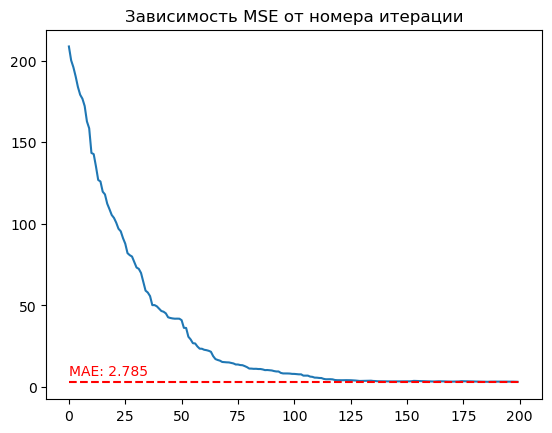

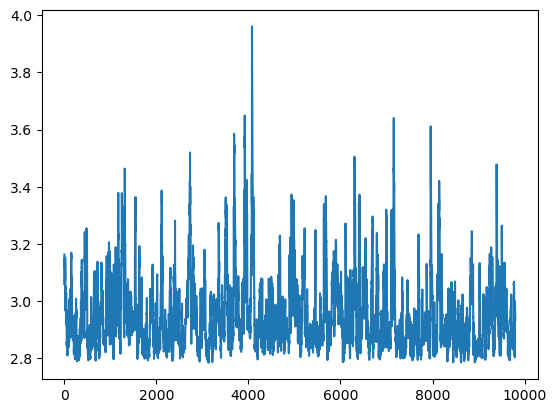

In [32]:
# ваш код

# для того чтобы запустить ровно 10000 итераций надо установить max_iter = 10000 и tol = 0
# по результатам экспериментов выбрана eta = 0.01
result = stochastic_gradient_descent(X, y, w0 = np.array([0,0,0,0]), eta = 0.01, max_iter = 10000, tol = 0) # 0.000001

import matplotlib.pyplot as plt

# разделим график на 2 части; от 0 до 200 итерации и от 200 до конца
# видно, что до 200  итерации ошибка резко падает и выходит на константу с небольшими колебаниями

plt.plot(result[1][0:200])
plt.title('Зависимость MSE от номера итерации')
plt.hlines(min(result[1]), 0, 200, color='r', linestyle='--')
plt.text(0, 7, f'MAE: {round(min(result[1]), 3)}', color='r')
plt.show()
plt.plot(result[1][200:])
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [16]:
# ваш код

w = result[0]  #  вектор весов
print(w)

[14.3163449   3.48410139  3.0656409   0.24815937]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [17]:
# ваш код

err = mse_error(y, lin_pred(X, w))
print(err)

3.2354812922451774
